<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%9B%D0%A04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лабораторная работа №4.
#### Сети Петри.
##### Вариант 11.

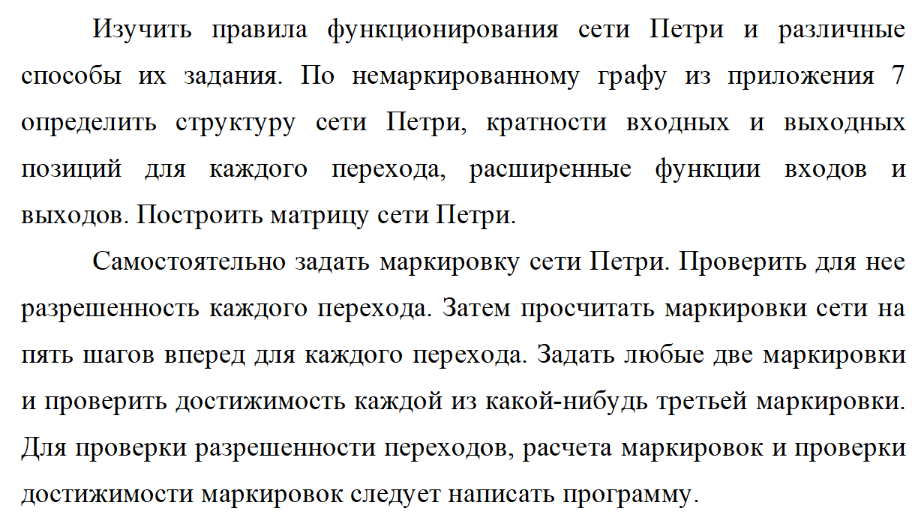

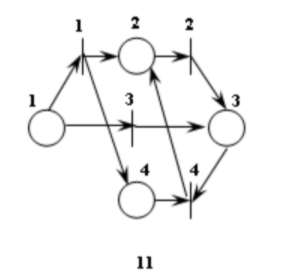

In [ ]:
#Данная сеть имеет вид:
#C = (P, T, I, O)
#P = (1,2,3,4), где n = 4 - множество позиций
#T = (1,2,3,4), где m = 4 - множество переходов
#Перечислим входные (слева) и выходные (справа) функции:
#I(t1=1) = {p1=1}; O(t1=1) = {p2=2,p4=4}
#I(t2=2) = {p2=2}; O(t2=2) = {p3=3}
#I(t3=3) = {p1=1}; O(t3=3) = {p3=3}
#I(t4=4) = {p3=3,p4=4}; O(t4=4) = {p2=2}

In [ ]:
#Кратности входных позиций:
# #(p1, I(t1))=1; #(p1, I(t2))=0; #(p1, I(t3))=1; #(p1, I(t4))=0
# #(p2, I(t1))=0; #(p2, I(t2))=1; #(p2, I(t3))=0; #(p2, I(t4))=0
# #(p3, I(t1))=0; #(p3, I(t2))=0; #(p3, I(t3))=0; #(p3, I(t4))=1
# #(p4, I(t1))=0; #(p4, I(t2))=0; #(p4, I(t3))=0; #(p4, I(t4))=1
#Кратности выходных позиций:
# #(p1, O(t1))=0; #(p1, O(t2))=0; #(p1, O(t3))=0; #(p1, O(t4))=0
# #(p2, O(t1))=1; #(p2, O(t2))=0; #(p2, O(t3))=0; #(p2, O(t4))=1
# #(p3, O(t1))=0; #(p3, O(t2))=1; #(p3, O(t3))=1; #(p3, O(t4))=0
# #(p4, O(t1))=1; #(p4, O(t2))=0; #(p4, O(t3))=0; #(p4, O(t4))=0

In [ ]:
#Расширенные входные (слева) и выходные (справа) функции:
#I(p1)={}; O(p1)={t1,t3}
#I(p2)={t1,t4}; O(p2)={t2}
#I(p3)={t2,t3}; O(p3)={t4}
#I(p4)={t1}; O(p4)={t4}

In [1]:
import numpy as np
import pandas as pd
import random
import copy
import math
import itertools as it

Матрица Сети Петри

In [7]:
#Матрица входов (строится по кратности входов)
input_table = [[0 for j in range(4)] for i in range(4)]
input_table[0][0] = 1
input_table[0][1] = 0
input_table[0][2] = 0
input_table[0][3] = 0
input_table[1][0] = 0
input_table[1][1] = 1
input_table[1][2] = 0
input_table[1][3] = 0
input_table[2][0] = 1
input_table[2][1] = 0
input_table[2][2] = 0
input_table[2][3] = 0
input_table[3][0] = 0
input_table[3][1] = 0
input_table[3][2] = 1
input_table[3][3] = 1

In [9]:
#Матрица выходов (строится по кратности выходов)
output_table = [[0 for j in range(4)] for i in range(4)]
output_table[0][0] = 0
output_table[0][1] = 1
output_table[0][2] = 0
output_table[0][3] = 1
output_table[1][0] = 0
output_table[1][1] = 0
output_table[1][2] = 1
output_table[1][3] = 0
output_table[2][0] = 0
output_table[2][1] = 0
output_table[2][2] = 1
output_table[2][3] = 0
output_table[3][0] = 0
output_table[3][1] = 1
output_table[3][2] = 0
output_table[3][3] = 0

In [10]:
#Матрица инциденции (из матрицы выходов вычесть матрицу входов)
incident_table = [[0 for j in range(4)] for i in range(4)]
for i in range(4):
  for j in range(4):
    incident_table[i][j] = output_table[i][j] - input_table[i][j]

[[-1, 1, 0, 1], [0, -1, 1, 0], [-1, 0, 1, 0], [0, 1, -1, -1]]